![](GMIT_Logo.jpg)

# Higher Diploma in Science in Computing (Data Analytics)
#### Programme Module: Programming for Data Analysis (COMP08050)
---
### Project 2020

![](Banner.png)

For this project we were tasked with producing a synthesised dataset through simulation. We were also asked to produce the data via the use of NumPy’s random package. The dataset produced had to simulate a real-world phenomenon of your choosing. I chose a dataset from the aviation industry which looked at flight delays across the United States. The dataset included information about the number, length and types of delays experienced at airports throughout the country for individual months. From this dataset we had to investigate the types of variables involved, their likely distributions and their relationships with each other and then synthesise/simulate a new dataset as closely matching their properties as possible. Let’s have a look at simulation and synthetic data first and discuss why they are so important.


What is simulation? Simulation is a tool to evaluate the performance of a system or process either existing or proposed. It is done under different configurations of interest and over long periods of real time. (Introduction to Modelling and Simulation). According to Wikipedia “*simulation is used in many contexts, such as simulation of technology for performance tuning or optimizing, safety engineering, testing, training, education, and video games. Often, computer experiments are used to study simulation models. Simulation is also used with scientific modelling of natural systems or human systems to gain insight into their functioning, as in economics. Simulation can be used to show the eventual real effects of alternative conditions and courses of action. Simulation is also used when the real system cannot be engaged, because it may not be accessible, or it may be dangerous or unacceptable to engage, or it is being designed but not yet built, or it may simply not exist*”. (Wikipedia, 2020).  Simulation can be used to answer questions such as what the best design for a new telecommunications network is or how will the behaviour of  a circuit or a device react when increased load is anticipated or how will and airport terminal operate with increasing passenger numbers.


In order to carry out simulation you require access to lots of data. If you don’t have access or the data doesn’t exist then you need to create it. The created data or synthetic data is artificial data that is created using different algorithms that mirror the statistical properties of the original data. In business synthetic data can be used in marketing to produce targeted individual level campaigns to reduce marketing spend and increase sales or in agile development and DevOps to test new software. Synthetic data is also used in the healthcare sector for clinical and scientific trials for producing a baseline for future studies and testing when no real data yet exists. (AI Multiple, 2020). Outlined below are just of the industries that benefit from synthetic data.


- __Automotive:__ Research to develop autonomous things such as robots, drones and self-driving car simulations pioneered the use of synthetic data.

- __Robotics:__ Real-life testing of robotic systems is expensive and slow. Synthetic data enables companies to test their robotics solutions in thousands of simulations, improving their robots and complementing expensive real-life testing.

- __Manufacturing:__ As Leo Tolstoy states at the beginning of Anna Karenina: “All happy families are alike; each unhappy family is unhappy in its own way.” It is hard to test a system to see whether it identifies anomalies since there are infinitely many anomalies. Synthetic data enables more effective testing of quality control systems, improving their performance.

- __Financial services:__ Fraud protection is a major part of any financial service and with synthetic data, new fraud detection methods can be tested and evaluated for their effectiveness.

- __Healthcare:__ Synthetic data enables healthcare data professionals to allow the public use of record data while still maintaining patient confidentiality.

- __Social Media:__ Facebook is using synthetic data to improve its various networking tools and to fight fake news, online harassment, and political propaganda from foreign governments by detecting bullying language on the platform.


The dataset I chose for this project is available from the CORGIS Dataset Project which was developed by Austin Bart to provide diverse real-world datasets for introductory computing. "*The CORGIS project (https://think.cs.vt.edu/corgis) enables instructors to easily incorporate data science into their classroom. Specifically, it provides over 40 datasets in areas including history, politics, medicine, and education. Additionally, the CORGIS infrastructure supports the integration of new datasets with simple libraries for Java, Python, and Racket, thus empowering introductory students to write programs that manipulate real data. Finally, the CORGIS web-based tools allow learners to visualize and explore datasets without programming, enabling data science lessons on day one.*"


The dataset as explained already looks at flight delays by airport across the United States. 


### Import required libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read in the dataset from CORGIS

In [64]:
df = pd.read_csv(
    'https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

<div class="alert alert-block alert-info"><b>Note: </b> After reading in the data I renamed and abbreviated some of the column labels due to their length.  

1. Delayed : DLA

2. Number : No
    
3. National Aviation System : NAS 

4. Flights : Flt
    
5. Minutes : Min 
</div> 

### Rename and abbreviate column names

In [65]:
df.rename(columns={"Airport.Code": "Airport Code", "Airport.Name": "Airport Name", "Time.Label": "Time Label",
                   "Time.Month": "Time Month", "Time.Month Name": "Time Month Name", "Time.Year": "Time Year",
                   "Statistics.# of Delays.Carrier": "No of DLA Carrier", "Statistics.# of Delays.Late Aircraft": "No of DLA Late Aircraft",
                   "Statistics.# of Delays.National Aviation System": "No of DLA NAS","Statistics.# of Delays.Security": "No of DLA Security",
                   "Statistics.# of Delays.Weather": "No of DLA Weather","Statistics.Carriers.Names": "Carriers Names", 
                   "Statistics.Carriers.Total": "Carriers Total", "Statistics.Flights.Cancelled": "Flt Cancelled",
                   "Statistics.Flights.Delayed": "Flt Delayed", "Statistics.Flights.Diverted": "Flt Diverted", 
                   "Statistics.Flights.On Time": "Flt On Time","Statistics.Flights.Total": "Flt Total", 
                   "Statistics.Minutes Delayed.Carrier": "Min DLA Carrier","Statistics.Minutes Delayed.Late Aircraft": "Min DLA Late Aircraft",
                   "Statistics.Minutes Delayed.National Aviation System": "Min DLA NAS","Statistics.Minutes Delayed.Security": "Min DLA Security", 
                   "Statistics.Minutes Delayed.Total": "Min DLA Total","Statistics.Minutes Delayed.Weather": "Min DLA Weather"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airport Code             4408 non-null   object
 1   Airport Name             4408 non-null   object
 2   Time Label               4408 non-null   object
 3   Time Month               4408 non-null   int64 
 4   Time Month Name          4408 non-null   object
 5   Time Year                4408 non-null   int64 
 6   No of DLA Carrier        4408 non-null   int64 
 7   No of DLA Late Aircraft  4408 non-null   int64 
 8   No of DLA NAS            4408 non-null   int64 
 9   No of DLA Security       4408 non-null   int64 
 10  No of DLA Weather        4408 non-null   int64 
 11  Carriers Names           4408 non-null   object
 12  Carriers Total           4408 non-null   int64 
 13  Flt Cancelled            4408 non-null   int64 
 14  Flt Delayed              4408 non-null  

In [66]:
df.drop(['Carriers Names', 'Carriers Total'], axis = 1);

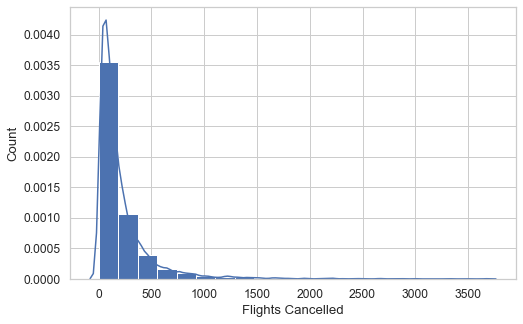

In [72]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Flt Cancelled'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Flights Cancelled', ylabel='Count');

In [67]:
numerical = [
    'No of DLA Carrier', 'No of DLA Late Aircraft', 'No of DLA NAS', 'No of DLA Security', 'No of DLA Weather', 'Flt Cancelled', 'Flt Delayed',
    'Flt Diverted', 'Flt On Time', 'Flt Total']
categorical = [
    'Airport Code', 'Airport Name', 'Time Label']

df = df[numerical + categorical]
df.shape

(4408, 13)

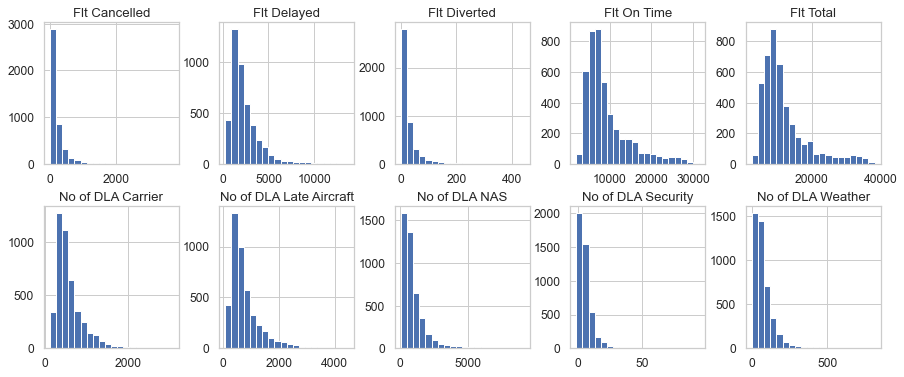

In [73]:
df[numerical].hist(bins=20, figsize=(15, 6), layout=(2, 5));

In [47]:
df.head()

,Airport Code,Airport Name,Time Label,Time Month,Time Month Name,Time Year,No of DLA Carrier,No of DLA Late Aircraft,No of DLA NAS,No of DLA Security,...,Flt Delayed,Flt Diverted,Flt On Time,Flt Total,Min DLA Carrier,Min DLA Late Aircraft,Min DLA NAS,Min DLA Security,Min DLA Total,Min DLA Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [17]:
df.tail()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Names,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,20,"American Airlines Inc.,Alaska Airlines Inc.,Je...",11,97,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,50,"American Airlines Inc.,Alaska Airlines Inc.,Je...",10,104,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,119,"American Airlines Inc.,Alaska Airlines Inc.,Je...",10,449,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,38,"American Airlines Inc.,Alaska Airlines Inc.,Je...",8,84,1175,14,7426,8699,32066,33682,8057,57,76978,3116
4407,TPA,"Tampa, FL: Tampa International",2016/01,1,January,2016,410,342,312,2,27,"American Airlines Inc.,Alaska Airlines Inc.,Je...",8,146,1095,7,4748,5996,22557,21164,11423,37,57774,2593


In [ ]:
### Rena

### Dataset info, null values etc.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Airport Code                               4408 non-null   object
 1   Airport Name                               4408 non-null   object
 2   Time Label                                 4408 non-null   object
 3   Time Month                                 4408 non-null   int64 
 4   Time Month Name                            4408 non-null   object
 5   Time Year                                  4408 non-null   int64 
 6   Number of Delays Carrier                   4408 non-null   int64 
 7   Number of Delays Late Aircraft             4408 non-null   int64 
 8   Number of Delays National Aviation System  4408 non-null   int64 
 9   Number of Delays Security                  4408 non-null   int64 
 10  Number of Delays Weather            

### Dataset info, null values etc.

In [42]:
df1 = df.copy()

In [43]:
# new data frame with split value columns 
new = df1["Airport Name"].str.split(",", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df1["City"]= new[0] 
  
# making separate last name column from new data frame 
df1["State"]= new[1] 
  
# Dropping old Name columns 
#df1.drop(columns =["Name"], inplace = True) 
#df1

In [44]:
# new data frame with split value columns 
new = df1["State"].str.split(":", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df1["State"]= new[0] 
  
# making separate last name column from new data frame 
df1["Airport"]= new[1] 
  
# Dropping old Name columns 
#df.drop(columns =["Name"], inplace = True) 

In [45]:
# df display 
df2=df1[["Airport Code", "Airport Name", "City", "State", "Airport", "Time Label", "Time Month", "Time Month Name", "Time Year", "Number of Delays Carrier", "Number of Delays Late Aircraft", "Number of Delays National Aviation System", "Number of Delays Security", "Number of Delays Weather", "Carriers Names", "Carriers Total", "Flights Cancelled", "Flights Delayed", "Flights Diverted", "Flights On Time", "Flights Total", "Minutes Delayed Carrier", "Minutes Delayed Late Aircraft", "Minutes Delayed National Aviation System", "Minutes Delayed Security", "Minutes Delayed Total", "Minutes Delayed Weather"
]]

In [47]:
#pd.set_option('display.max_columns', None)
#df2
df2.head()

,Airport Code,Airport Name,City,State,Airport,Time Label,Time Month,Time Month Name,Time Year,Number of Delays Carrier,Number of Delays Late Aircraft,Number of Delays National Aviation System,Number of Delays Security,Number of Delays Weather,Carriers Names,Carriers Total,Flights Cancelled,Flights Delayed,Flights Diverted,Flights On Time,Flights Total,Minutes Delayed Carrier,Minutes Delayed Late Aircraft,Minutes Delayed National Aviation System,Minutes Delayed Security,Minutes Delayed Total,Minutes Delayed Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",Atlanta,GA,Hartsfield-Jackson Atlanta International,2003/06,6,June,2003,1009,1275,3217,17,328,"American Airlines Inc.,JetBlue Airways,Contine...",11,216,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",Boston,MA,Logan International,2003/06,6,June,2003,374,495,685,3,66,"American Airlines Inc.,Alaska Airlines Inc.,Co...",14,138,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",Baltimore,MD,Baltimore/Washington International Thurgood M...,2003/06,6,June,2003,296,477,389,8,78,"American Airlines Inc.,Continental Air Lines I...",11,29,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",Charlotte,NC,Charlotte Douglas International,2003/06,6,June,2003,300,472,735,2,54,"American Airlines Inc.,Continental Air Lines I...",11,73,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",Washington,DC,Ronald Reagan Washington National,2003/06,6,June,2003,283,268,487,4,58,"American Airlines Inc.,Alaska Airlines Inc.,Co...",13,74,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [119]:
df1.describe()

,Time Month,Time Year,Number of Delays Carrier,Number of Delays Late Aircraft,Number of Delays National Aviation System,Number of Delays Security,Number of Delays Weather,Carriers Total,Flights Cancelled,Flights Delayed,Flights Diverted,Flights On Time,Flights Total,Minutes Delayed Carrier,Minutes Delayed Late Aircraft,Minutes Delayed National Aviation System,Minutes Delayed Security,Minutes Delayed Total,Minutes Delayed Weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


In [117]:
df2['Minutes Delayed Carrier'] = pd.to_timedelta(df['Minutes Delayed Carrier'],unit='m')
df2['Minutes Delayed Late Aircraft'] = pd.to_timedelta(df['Minutes Delayed Late Aircraft'],unit='m')
df2['Minutes Delayed National Aviation System'] = pd.to_timedelta(df['Minutes Delayed National Aviation System'],unit='m')
df2['Minutes Delayed Security'] = pd.to_timedelta(df['Minutes Delayed Security'],unit='m')
df2['Minutes Delayed Total'] = pd.to_timedelta(df['Minutes Delayed Total'],unit='m')
df2['Minutes Delayed Weather'] = pd.to_timedelta(df['Minutes Delayed Weather'],unit='m')

In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype          
---  ------                                     --------------  -----          
 0   Airport Code                               4408 non-null   object         
 1   Airport Name                               4408 non-null   object         
 2   City                                       4408 non-null   object         
 3   State                                      4408 non-null   object         
 4   Airport                                    4408 non-null   object         
 5   Time Label                                 4408 non-null   object         
 6   Time Month                                 4408 non-null   int64          
 7   Time Month Name                            4408 non-null   object         
 8   Time Year                                  4408 non-null   int64          
 9   Number o

|__Key__     |__Datatype__ | __Comment__ |__Example Value__|
|:---------------------------------|:----------|:----------------------------------------------------------|--:|
|	Airport.Code	|	String	|	The 3 letter code for this airport, assigned by IATA. For more information, consult this List of Airport Codes.	|	"ATL"	|
|	Airport.Name	|	String	|	The full name of this airport.	|	"Atlanta, GA: Hartsfield-Jackson Atlanta International"	|
|	Time.Label	|	String	|	The "year/month" reported as a string, to make it easier to sort by time periods.	|	"2003/06"	|
|	Time.Month	|	Integer	|	The reported month as a number. 0 is January, 1 is February, etc.	|	6	|
|	Time.Month Name	|	String	|	MISSING_FIELD	|	"June"	|
|	Time.Year	|	Integer	|	The reported year as a 4-digit number.	|	2003	|
|	Statistics.# of Delays.Carrier	|	Integer	|	The number of delays and cancellations due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.) in this month.	|	1009	|
|	Statistics.# of Delays.Late Aircraft	|	Integer	|	The number of delays and cancellations caused by a previous flight with the same aircraft arriving late, causing the present flight to depart late in this month.	|	1275	|
|	Statistics.# of Delays.National Aviation System	|	Integer	|	The number of delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control in this month.	|	3217	|
|	Statistics.# of Delays.Security	|	Integer	|	Number of delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas in this month.	|	17	|
|	Statistics.# of Delays.Weather	|	Integer	|	Number of delays or cancellations caused by significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane in this month.	|	328	|
|	Statistics.Carriers.Names	|	String	|	The full names of the carriers that reported in.	|	"American Airlines Inc.,JetBlue Airways,Continental Air Lines Inc.,Delta Air Lines Inc.,Atlantic Southeast Airlines,AirTran Airways Corporation,America West Airlines Inc.,Northwest Airlines Inc.,ExpressJet Airlines Inc.,United Air Lines Inc.,US Airways Inc."	|
|	Statistics.Carriers.Total	|	Integer	|	The number of carriers that reported flight information during this time period and at this location.	|	11	|
|	Statistics.Flights.Cancelled	|	Integer	|	The number of flights that were cancelled in this month.	|	216	|
|	Statistics.Flights.Delayed	|	Integer	|	The number of flights that were delayed in this month.	|	5843	|
|	Statistics.Flights.Diverted	|	Integer	|	The number of flights that were diverted in this month.	|	27	|
|	Statistics.Flights.On Time	|	Integer	|	The number of flights that were on time in this month.	|	23974	|
|	Statistics.Flights.Total	|	Integer	|	The total number of flights in this month.	|	30060	|
|	Statistics.Minutes Delayed.Carrier	|	Integer	|	The number of minutes delayed due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.) in this month.	|	61606	|
|	Statistics.Minutes Delayed.Late Aircraft	|	Integer	|	The number of minutes delayed caused by a previous flight with the same aircraft arriving late, causing the present flight to depart late in this month.	|	68335	|
|	Statistics.Minutes Delayed.National Aviation System	|	Integer	|	The number of minutes delayed attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control in this month.	|	118831	|
|	Statistics.Minutes Delayed.Security	|	Integer	|	Number of minutes delayed caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas in this month.	|	518	|
|	Statistics.Minutes Delayed.Total	|	Integer	|	$MISSING_FIELD	|	268764	|
|	Statistics.Minutes Delayed.Weather	|	Integer	|	Number of of minutes delayed caused by significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane in this month.	|	19474	|

### References

[1] Romani, E., 2020. *How To Generate Pseudo-Random Datasets In Python: Start From Scratch With Numpy & Faker*. [online] Medium. Available at: <https://towardsdatascience.com/how-to-generate-pseudo-random-datasets-in-python-start-from-scratch-with-numpy-faker-c5661e3bc58b> [Accessed 25 November 2020].

[2] The Alan Turing Institute. 2020. *Interpreting Large Datasets Using Simulation*. [online] Available at: <https://www.turing.ac.uk/research/research-projects/interpreting-large-datasets-using-simulation> [Accessed 25 November 2020].

[3] Zief0002.github.io. 2020. *Monte Carlo Simulation | Statistical Thinking: A Simulation Approach To Modeling Uncertainty*. [online] Available at: <https://zief0002.github.io/statistical-thinking/monte-carlo-simulation.html> [Accessed 25 November 2020].

[4] Obi Tayo, B., 2019. *Machine Learning Model For Stochastic Processes*. [online] Medium. Available at: <https://medium.com/towards-artificial-intelligence/machine-learning-model-for-stochastic-processes-c65a96f0b8c5> [Accessed 25 November 2020].

[5] Obi Tayo, B., 2019. *Building A Machine Learning Model When Data isn’t Available*. [online] Medium. Available at: <https://medium.com/towards-artificial-intelligence/building-a-machine-learning-model-when-data-isnt-available-fce8d20f0fd0> [Accessed 24 November 2020].

[6] appliedAI. 2020. *Synthetic Data Generation: Techniques, Best Practices & Tools*. [online] Available at: <https://research.aimultiple.com/synthetic-data-generation/> [Accessed 25 November 2020].

[7] GitHub. 2018. *Theodi/Synthetic-Data-Tutorial*. [online] Available at: <https://github.com/theodi/synthetic-data-tutorial> [Accessed 24 November 2020].

[8] Corgis-edu.github.io. 2020. *CORGIS Datasets Project*. [online] Available at: <https://corgis-edu.github.io/corgis/> [Accessed 1 December 2020].

[9] PhUSE. 2020. *An Introduction To Data Synthesis For Data Scientists*. [online] Available at: <https://www.phuse.eu/blog/an-introduction-to-data-synthesis-for-data-scientists> [Accessed 1 December 2020].

[10] Tausend, F., 2020. *Generate Your Sample Dataset — A Must Have Skill For Data Scientists*. [online] Medium. Available at: <https://towardsdatascience.com/generate-your-sample-dataset-a-must-have-skill-for-data-scientists-36ded8600b79> [Accessed 1 December 2020].

[11] Yildirim, S., 2020. *A Practical Guide For Exploratory Data Analysis: Flight Delays*. [online] Medium. Available at: <https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-flight-delays-f8a713ef7121> [Accessed 1 December 2020].

[12] BookIt Blog!. 2020. *Flight Delay Analysis: Flight Delays In The U.S*. [online] Available at: <https://blog.bookit.com/an-analysis-of-flight-delays-in-the-united-states/> [Accessed 1 December 2020].

[13] appliedAI. 2020. *The Ultimate Guide To Synthetic Data In 2020*. [online] Available at: <https://research.aimultiple.com/synthetic-data/> [Accessed 1 December 2020].

[14] Mueller, E. and Chatterji, G., 2002. *Analysis Of Aircraft Arrival And Departure Delay Characteristics*. [online] ResearchGate. Available at: <https://www.researchgate.net/publication/242389466_Analysis_of_Aircraft_Arrival_and_Departure_Delay_Characteristics> [Accessed 1 December 2020].

[15] 